#REGRESSION
Tips in Built

reg , why plot apply (0-1) (no more or less 0,1) , log , pipeline(reduce steps), classification (metrics) [score....] , report

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mpl

sns.set_style('whitegrid')
mpl.rcParams['figure.figsize'] = (12,6)

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = sns.load_dataset('tips')

In [5]:
df #data of seaborn

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


là hàm built-in của Python, dùng để:

Liệt kê tất cả thuộc tính, hàm, class, biến mà một object hoặc module đang có

Giúp khám phá nhanh API khi bạn chưa nhớ rõ tên hàm

In [7]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_base',
 '_compat',
 '_core',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix

Liệt kê tên tất cả các dataset mẫu (sample datasets) mà seaborn cung cấp sẵn.

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


#**SEE THE REGRESSION**

In [11]:
df.info()
# bởi vì ở đây có category nên ko dùng được corr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:
df['smoker'].value_counts()

,count
smoker,
No,151
Yes,93


In [12]:

df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


run regression (total bill và tip)

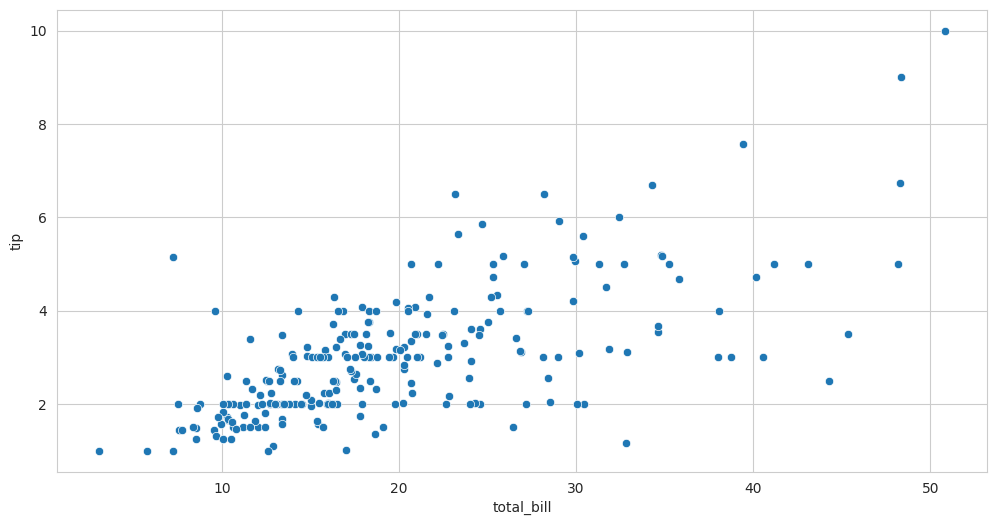

In [13]:
sns.scatterplot(x='total_bill',y='tip',data=df);

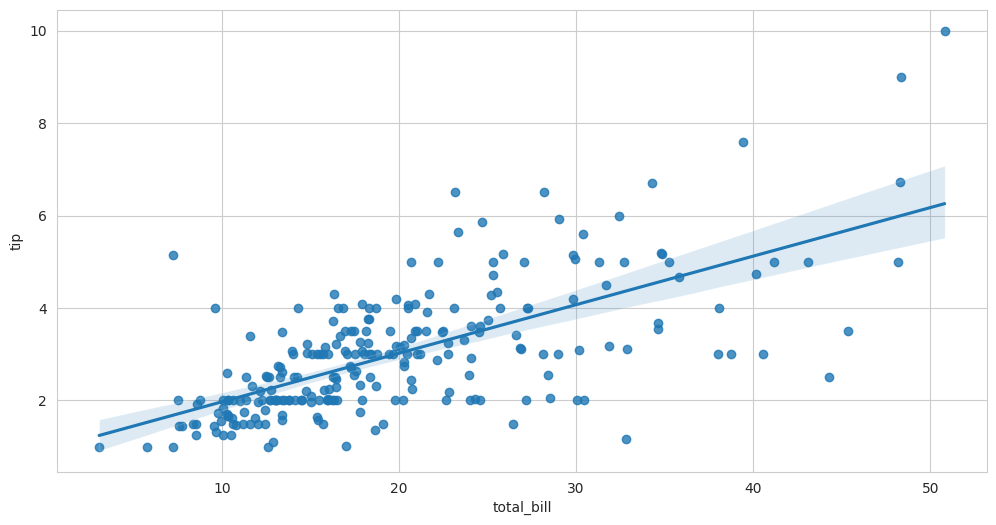

In [14]:
sns.regplot(x='total_bill',y='tip',data=df);

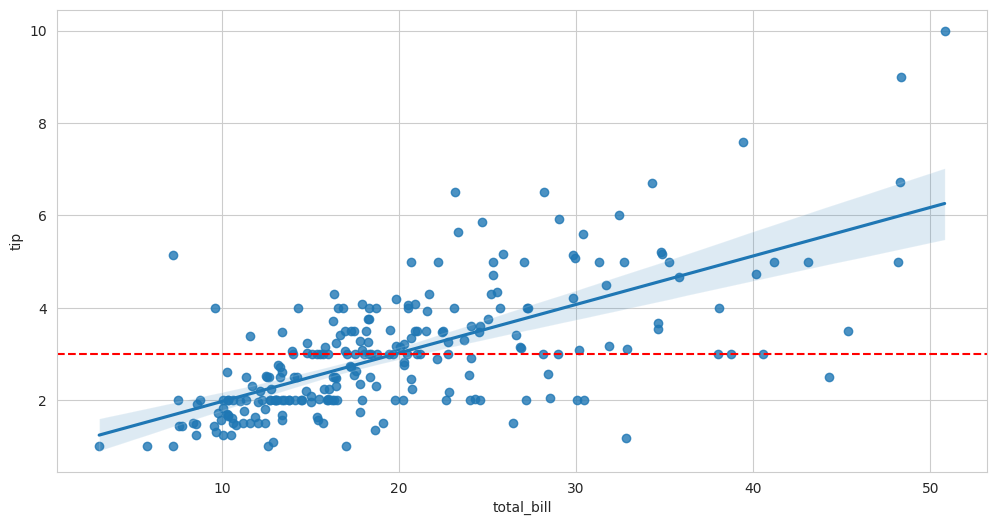

In [17]:
sns.regplot(x='total_bill',y='tip',data=df);
plt.axhline(y=df['tip'].mean(),color='r',linestyle='--');

Mối quan hệ thuận (Positive Correlation): Đường hồi quy màu xanh hướng lên trên cho thấy khi số tiền hóa đơn càng lớn, số tiền tip cũng có xu hướng tăng theo.

Độ phân tán dữ liệu: Các chấm xanh (dữ liệu thực tế) tập trung khá sát đường hồi quy ở mức hóa đơn thấp, nhưng bắt đầu phân tán rộng hơn khi hóa đơn cao (trên 30), cho thấy phương sai thay đổi (heteroscedasticity) - tức là khó dự đoán tiền tip chính xác hơn ở các hóa đơn lớn.

Vùng bóng mờ: Là khoảng tin cậy (confidence interval) của đường hồi quy. Vùng này loe rộng ra ở phía bên phải, phản ánh sự không chắc chắn tăng lên đối với các hóa đơn giá trị cao do dữ liệu thưa thớt hơn.

Đường đỏ nét đứt: Là một đường tham chiếu ngang ở mức tip = 3. Nó dùng để so sánh xu hướng tăng của tiền tip so với một mức cố định (ví dụ: mức tip trung bình).

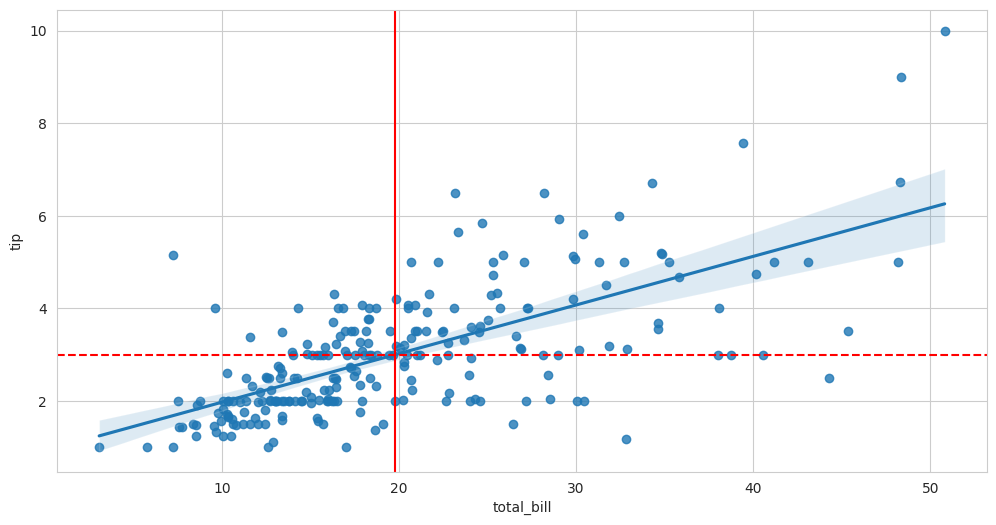

In [19]:
sns.regplot(x='total_bill',y='tip',data=df);
plt.axhline(y=df['tip'].mean(),color='r',linestyle='--')
plt.axvline(x=df['total_bill'].mean(),color='r')

salary of chef - staff based on tips

Điểm trung tâm (Reference Point): Sự cắt nhau giữa đường dọc (hóa đơn ~ 20) và đường ngang nét đứt (tip ~ 3) thường biểu thị giá trị trung bình (mean) hoặc trung vị (median) của tập dữ liệu. Nó đóng vai trò là "mỏ neo" để so sánh.Phân chia góc phần tư (Quadrants): Hai đường đỏ chia biểu đồ thành 4 vùng, giúp bạn phân loại khách hàng nhanh chóng:Góc trên-phải: Khách "sộp" (Hóa đơn cao, Tip cao).Góc dưới-trái: Khách chi tiêu thấp (Hóa đơn thấp, Tip thấp).Góc dưới-phải: Khách "keo kiệt" (Hóa đơn cao nhưng Tip thấp hơn mức chuẩn 3 đồng).Góc trên-trái: Khách hào phóng (Hóa đơn thấp nhưng Tip cao hơn mức chuẩn).Mối tương quan: Đường hồi quy màu xanh đi qua gần giao điểm của hai đường đỏ, khẳng định lại tính đại diện của mô hình tuyến tính đối với xu hướng trung tâm của dữ liệu.

In [23]:
!pip install pingouin
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.7 MB/s eta 0:00:00


#ECONOMETRIC APPROACH

In [25]:
pg.linear_regression(df[['total_bill']],df['tip'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.920270,0.159735,5.761236,2.526443e-08,0.456617,0.454371,0.605622,1.234918
1,total_bill,0.105025,0.007365,14.260355,6.692471e-34,0.456617,0.454371,0.090517,0.119532


Quy luật hành vi: Khách hàng thường tip mức "sàn" khoảng 0.92 USD, sau đó tip thêm 10.5% trên tổng giá trị hóa đơn.

Độ chính xác: Giá trị hóa đơn giải thích được 46% lý do khách tip nhiều hay ít. Mối quan hệ này là chắc chắn (có ý nghĩa thống kê).

#MACHINE LEARNING APPROACH

DATA PROCESSING
DATA FIT
DATA PREDICT
DATA EVALUATION

In [26]:
#import machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['total_bill']], #data frame should use double []
    df[['tip']],
    test_size=0.2,
    random_state=42
)

| Biến | Kiểu                | Shape                     |
| ---- | ------------------- | ------------------------- |
| `X`  | DataFrame / ndarray | `(n_samples, n_features)` |
| `y`  | Series / ndarray    | `(n_samples,)`            |


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Fit scaler trên TRAIN, chỉ transform TEST.
Không bao giờ fit test.

In [30]:
model = LinearRegression().fit(X_train_scaled, y_train)

#**PREDICT**

In [32]:
y_pred = model.predict(X_test_scaled)
# dự đoán trên x test

In [33]:
y_pred

array([[3.04525623],
       [1.86330727],
       [3.55119456],
       [3.69452593],
       [2.31576375],
       [2.83881627],
       [3.96728338],
       [2.26014262],
       [2.50615915],
       [2.57033737],
       [2.88160176],
       [2.07723468],
       [2.06439904],
       [2.47407003],
       [2.00236009],
       [2.91903905],
       [2.92652651],
       [3.23351235],
       [2.68478854],
       [5.33107064],
       [3.13831465],
       [3.13403611],
       [2.4558862 ],
       [1.94673896],
       [3.16077703],
       [2.17564129],
       [2.02375283],
       [3.62927807],
       [2.68906708],
       [6.07767732],
       [4.99734388],
       [1.75313465],
       [2.83025918],
       [3.09552917],
       [2.74040966],
       [3.50092162],
       [2.21200895],
       [5.53644096],
       [2.33287794],
       [3.35010279],
       [2.04942412],
       [2.47834858],
       [3.48701634],
       [2.03017065],
       [2.03124029],
       [1.25361414],
       [2.05798121],
       [2.924

In [34]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[3.04525623],
       [1.86330727],
       [3.55119456],
       [3.69452593],
       [2.31576375],
       [2.83881627],
       [3.96728338],
       [2.26014262],
       [2.50615915],
       [2.57033737],
       [2.88160176],
       [2.07723468],
       [2.06439904],
       [2.47407003],
       [2.00236009],
       [2.91903905],
       [2.92652651],
       [3.23351235],
       [2.68478854],
       [5.33107064],
       [3.13831465],
       [3.13403611],
       [2.4558862 ],
       [1.94673896],
       [3.16077703],
       [2.17564129],
       [2.02375283],
       [3.62927807],
       [2.68906708],
       [6.07767732],
       [4.99734388],
       [1.75313465],
       [2.83025918],
       [3.09552917],
       [2.74040966],
       [3.50092162],
       [2.21200895],
       [5.53644096],
       [2.33287794],
       [3.35010279],
       [2.04942412],
       [2.47834858],
       [3.48701634],
       [2.03017065],
       [2.03124029],
       [1.25361414],
       [2.05798121],
       [2.924

In [35]:
dir(y_pred)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


#**USE INTERCEPT**

In [36]:
model.intercept_, model.coef_

(array([3.08779487]), array([[0.93571714]]))

Khi total_bill tăng 1 độ lệch chuẩn (1 standard deviation)
→ tip tăng trung bình ~ 0.936 đơn vị (USD).

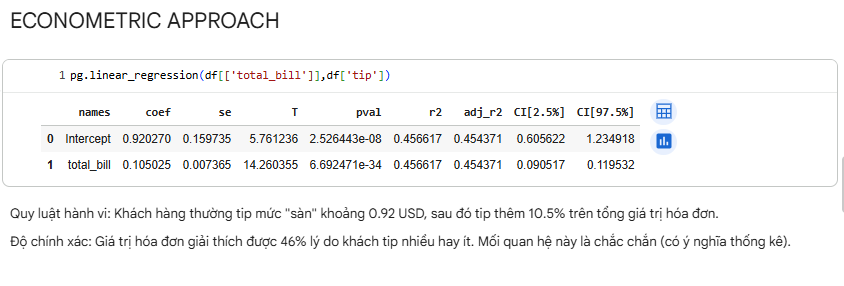

why different ?

- because we split  data - scaling (in machine approach)

In [37]:
df['total_bill'].mean() , df['total_bill'].std()
# cái hình vẽ trên khá đúng nha matplot á

(np.float64(19.78594262295082), 8.902411954856856)

so that: 3,02 is the mean that whenever customers pay nearly 19  we get ~3$

Với một hóa đơn cỡ trung bình (~20 USD), tiền tip thường khoảng 3 USD.


In [38]:
#at mean , average tip
model.intercept_

# “Với hóa đơn trung bình, tip khoảng 3 USD.”

array([3.08779487])

In [39]:
#people pay avergae 15% tip
 (model.intercept_/df['total_bill'].mean())*100

#“Trung bình khách tip bao nhiêu %?”

array([15.60600337])

In [40]:
model.coef_
# Bill cao hơn bình thường → tip cũng cao hơn, cứ ăn thêm gần 10 đô thì bo thêm khoảng 1 đô.

array([[0.93571714]])

In [41]:
model.intercept_ + model.coef_
#“Với hóa đơn cao hơn bình thường (~29 USD), tip khoảng 4 USD.”

array([[4.02351201]])

In [42]:
model.intercept_ - model.coef_
#Tip dự đoán khi bill = trung bình − 1 SD (~11 USD)

array([[2.15207773]])

In [46]:
(model.intercept_+ model.coef_) / (df['total_bill'].mean() + df['total_bill'].std())
#Tính % tip tại mức bill cao hơn trung bình

array([[0.14024896]])

#**FINAL (MODEL)**

**Bạn hỏi mô hình:**

#Ăn nhiều tiền hơn thì có bo nhiều hơn không? Bo tăng bao nhiêu?

# Intercept ≈ 3

Nghĩa là:

Nếu bill ở mức bình thường (~20 USD)
→ tip khoảng 3 USD


# Coefficient ≈ 0.94 ⭐


Nghĩa là:

Bill cao hơn bình thường → tip cao hơn bình thường

Đổi sang cách nói đời thường:

Bill tăng 1 USD → tip tăng khoảng 10 cent

👉 Đây là insight chính.

#“Khách ăn càng nhiều tiền thì bo càng nhiều, trung bình khoảng 10% hóa đơn.”


vấn đề họ ăn nhiều pay nhiều nhưng (tip : thấp)
-> handle : move quick (tham khảo MC DONALS, KFC)

https://chatgpt.com/s/t_695b23fcda508191bbbb82f99e4b4b26


#**PIPE LINE**
Pipeline trong sklearn dùng để kết nối nhiều bước xử lý dữ liệu và mô hình thành một quy trình duy nhất, theo thứ tự:

In [47]:
#call
from sklearn.pipeline import Pipeline

In [48]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#SPLIT DATA

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['total_bill']],
    df[['tip']],
    test_size=0.2,
    random_state=123
)

In [55]:
my_first_pipe = Pipeline([
    ('my_scale',StandardScaler()),
    ('reg',LinearRegression())

])

In [56]:
my_first_pipe.fit(X_train,y_train)

Pipeline(steps=[('my_scale', StandardScaler()), ('reg', LinearRegression())])

Pipeline = quy trình xử lý dữ liệu + mô hình ML được đóng gói chuẩn chỉnh, tránh lỗi, dễ mở rộng và bắt buộc trong ML nghiêm túc.

In [57]:
dir(my_first_pipe)
#fit , named_steps

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_can_fit_transform',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_method_params',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_for_step',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params',
 '_ge

In [58]:
my_first_pipe.named_steps['reg']

LinearRegression()

#SAME RESULTS WITH MACHINE LEARNING APPROACH = PIPE LINE

In [59]:
my_first_pipe.named_steps['reg'].coef_, my_first_pipe.named_steps['reg'].intercept_


(array([[1.01029217]]), array([3.02164103]))

PREDICT

In [62]:
y_pred = my_first_pipe.predict(X_test)
y_pred

array([[5.11873409],
       [3.14003447],
       [4.25433087],
       [2.00188464],
       [2.87878251],
       [4.21798277],
       [3.19796425],
       [2.68681912],
       [4.08508503],
       [3.04575659],
       [1.92350905],
       [2.96170161],
       [2.57663894],
       [2.41420838],
       [2.37786028],
       [3.34903604],
       [1.96780829],
       [3.00259322],
       [5.94565333],
       [2.82993976],
       [3.71478878],
       [2.5527855 ],
       [2.12228771],
       [2.66750919],
       [2.18703276],
       [2.73339012],
       [5.47312805],
       [4.74843783],
       [2.75837944],
       [2.36309387],
       [4.41221792],
       [2.08707549],
       [4.20889574],
       [2.71748783],
       [3.14457798],
       [1.74290443],
       [2.44374121],
       [3.6670819 ],
       [3.58757043],
       [2.28585416],
       [2.91967412],
       [2.5584649 ],
       [3.09914286],
       [2.66069392],
       [5.35726848],
       [3.65799488],
       [2.04618388],
       [3.168

#**EVALUATE (SCALE)**

In [63]:
mean_squared_error(y_test,y_pred)

0.6634638687730605

In [64]:
r2_score(y_test, y_pred)
# Goal predict not training : so we use y_test

0.25252308863463857

#**CLASSIFICATION**- dự đoán nhãn rời rạc (discrete label).

LOGISTIC REGRESSION

In [65]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mpl

sns.set_style('whitegrid')
mpl.rcParams['figure.figsize'] = (12,6)

import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 100, n_features=2 , n_classes=2, n_redundant = 0, random_state=123)

Ý nghĩa các tham số

n_samples=100
→ Tạo 100 quan sát (100 dòng dữ liệu)

n_features=2
→ Mỗi quan sát có 2 đặc trưng (2 cột X)
→ Thường dùng để vẽ scatter plot trực quan

n_classes=2
→ Bài toán Binary Classification (2 lớp: 0 và 1)

n_redundant=0
→ Không có feature dư thừa (feature phụ thuộc tuyến tính vào feature khác)

random_state=123
→ Cố định kết quả sinh dữ liệu để chạy lại vẫn giống nhau

In [69]:
X.shape, y.shape

((100, 2), (100,))

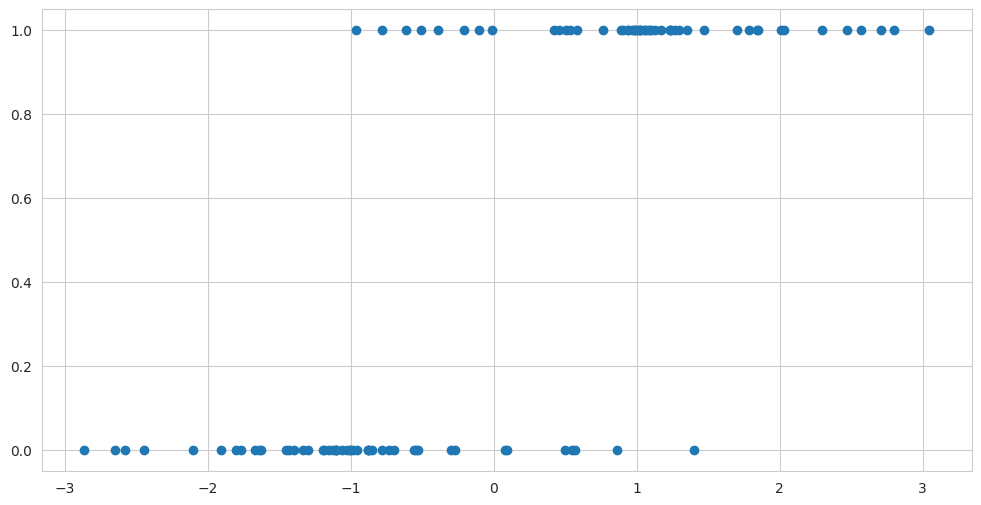

In [72]:
plt.scatter(X[:,0],y)

<Axes: >

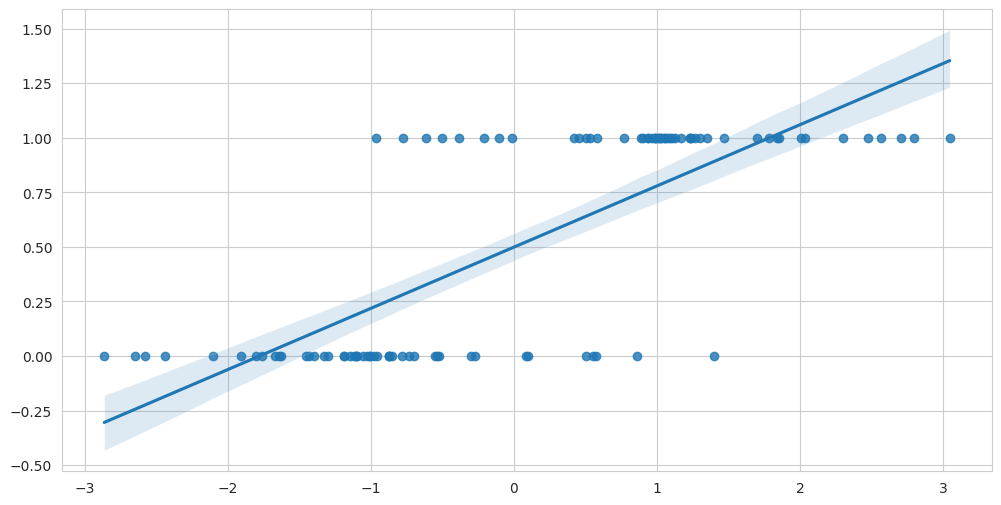

In [76]:
sns.regplot(x=X[:, 0], y=y, logistic=False)

In [74]:
import statsmodels.api as sm

In [75]:
ols_cl = sm.OLS(y, sm.add_constant(X[:,0])).fit()

In [77]:
print(ols_cl.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     133.7
Date:                Mon, 05 Jan 2026   Prob (F-statistic):           5.16e-20
Time:                        02:55:31   Log-Likelihood:                -29.481
No. Observations:                 100   AIC:                             62.96
Df Residuals:                      98   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4989      0.033     15.177      0.0

tai sao k dung OLS?

Không dùng OLS cho classification vì OLS vi phạm các giả định thống kê cốt lõi và cho dự đoán xác suất sai.

cant not be accpected bởi vì nó vượt qua line 0 ,1

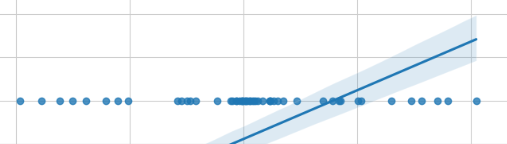

#**LINEAR PROBABILITY MODEL (LPM)**

In [79]:
dir(ols_cl)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

In [82]:
ols_cl.params[0]
#constant number

np.float64(0.49894324957175973)

In [84]:
ols_cl.params[0] + ols_cl.params[1] * X[:,0].min()

np.float64(-0.3040469634831191)

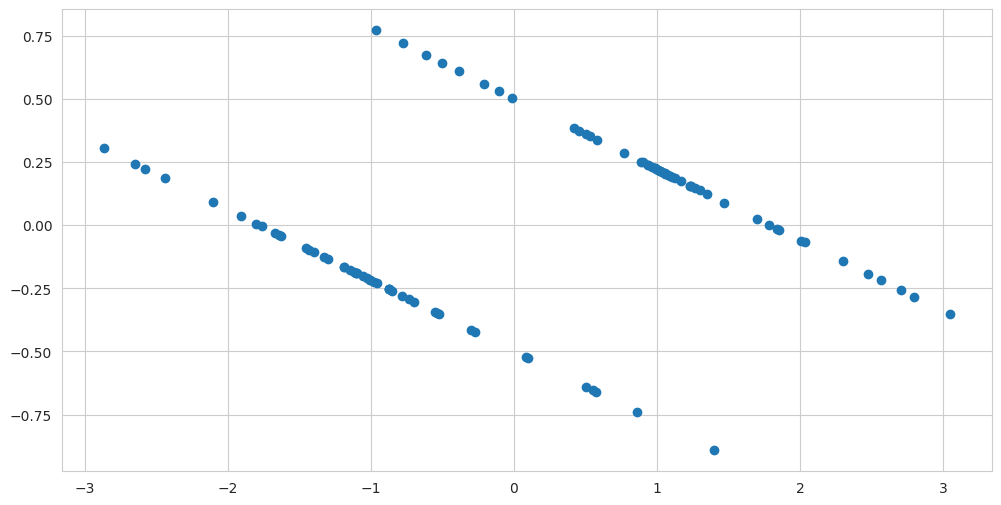

In [86]:
plt.scatter(X[:,0], ols_cl.resid);
#residual

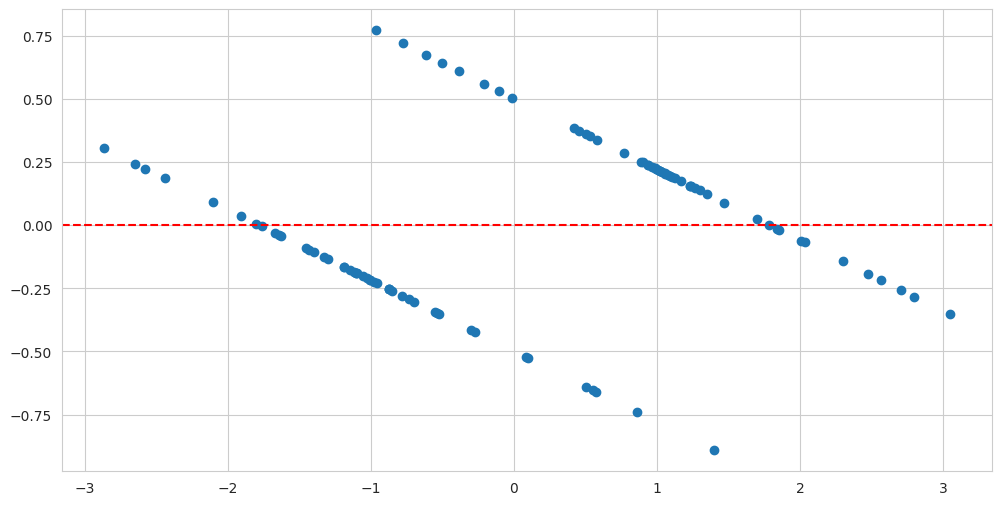

In [90]:
plt.scatter(X[:,0], ols_cl.resid);
plt.axhline(y=0, color='r', linestyle='--')
#cant not accept but violate OLS (up -> small x2)
#LPM in many cases -> we need to find the way to solve


#Potential Solution: ODD?

In [92]:
p = np.arange( 0 , 1, 0.01)
p

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [93]:
odds = p / (1-p)
odds

array([0.00000000e+00, 1.01010101e-02, 2.04081633e-02, 3.09278351e-02,
       4.16666667e-02, 5.26315789e-02, 6.38297872e-02, 7.52688172e-02,
       8.69565217e-02, 9.89010989e-02, 1.11111111e-01, 1.23595506e-01,
       1.36363636e-01, 1.49425287e-01, 1.62790698e-01, 1.76470588e-01,
       1.90476190e-01, 2.04819277e-01, 2.19512195e-01, 2.34567901e-01,
       2.50000000e-01, 2.65822785e-01, 2.82051282e-01, 2.98701299e-01,
       3.15789474e-01, 3.33333333e-01, 3.51351351e-01, 3.69863014e-01,
       3.88888889e-01, 4.08450704e-01, 4.28571429e-01, 4.49275362e-01,
       4.70588235e-01, 4.92537313e-01, 5.15151515e-01, 5.38461538e-01,
       5.62500000e-01, 5.87301587e-01, 6.12903226e-01, 6.39344262e-01,
       6.66666667e-01, 6.94915254e-01, 7.24137931e-01, 7.54385965e-01,
       7.85714286e-01, 8.18181818e-01, 8.51851852e-01, 8.86792453e-01,
       9.23076923e-01, 9.60784314e-01, 1.00000000e+00, 1.04081633e+00,
       1.08333333e+00, 1.12765957e+00, 1.17391304e+00, 1.22222222e+00,
      

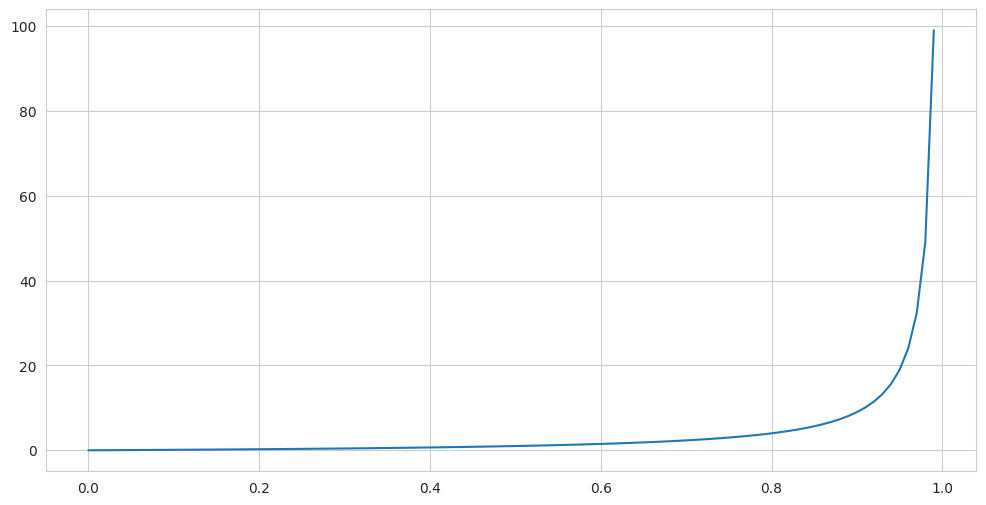

In [94]:
plt.plot(p,odds);

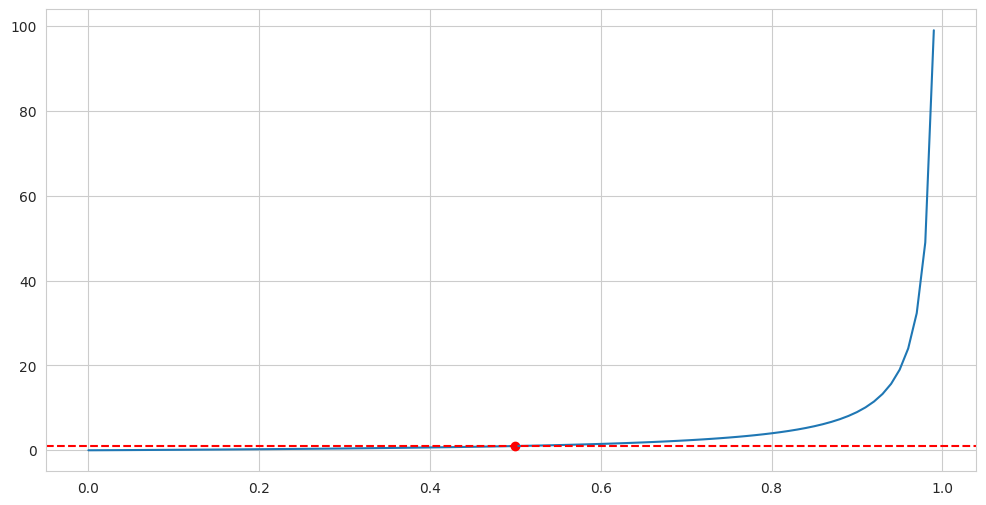

In [97]:
plt.plot(p,odds);
plt.scatter( 0.5,1,color='r');
plt.axhline(y=1, color='r', linestyle='--') # more clear


#**FINAL SOLUTION : LOG OF ODDS (LOGIT)**

**KEY CONCEPTS**

1/ Linear combination

2/ Sigmoid function

3/ Decision Boundary

In [101]:
sigmoid = lambda z: 1/(1+np.exp(-z))
def sigmoid(x):
  return 1 / (1+np.exp(-x))

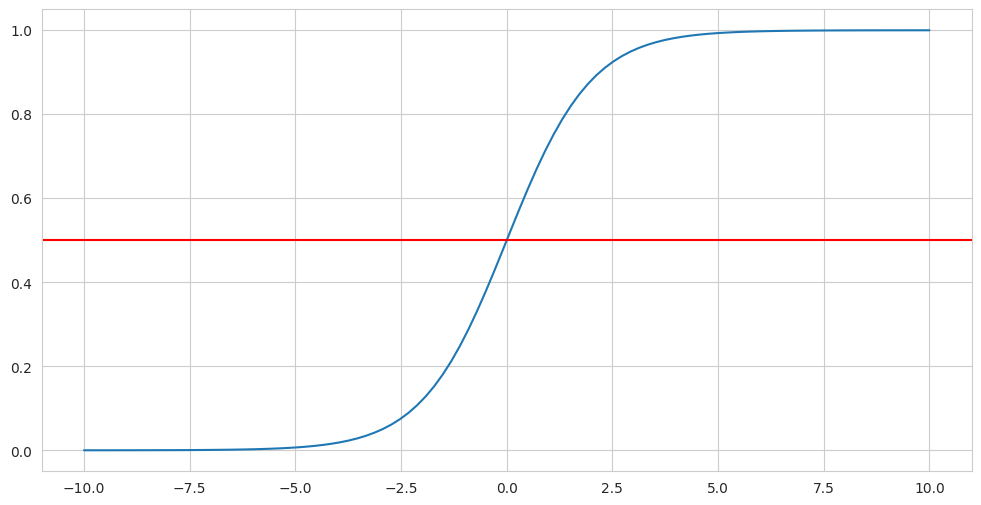

In [105]:
x = np.linspace(-10,10,100)
plt.plot(x,sigmoid(x));
plt.axhline(y=0.5,color='r')

In [107]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 100, n_features=2 , n_classes=2, n_redundant = 0, random_state=13)

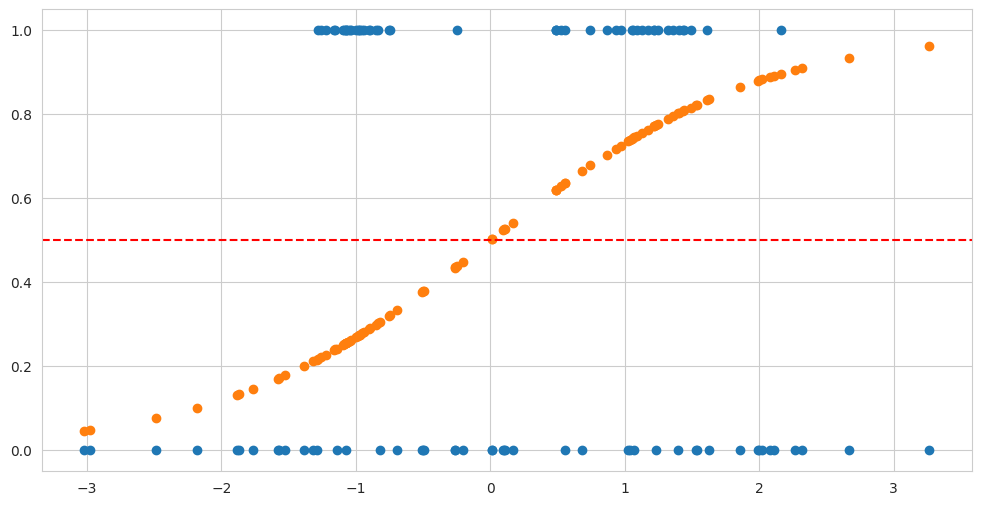

In [111]:
plt.scatter(X[:,0], y)
plt.scatter(X[:,0], sigmoid(X[:,0]));
plt.axhline(y=0.5,color='r',linestyle='--')

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer, load_wine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score

In [113]:
df = load_breast_cancer()

In [114]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [115]:
#Split
X_train , X_test , y_train, y_test = train_test_split(df.data,df.target,test_size= 0.3, random_state=11)

In [116]:
b_pip = Pipeline([
    ('scaler',StandardScaler()),
    ('logistic',LogisticRegression())
])

In [117]:
#fit model
b_pip.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [119]:
#Predict
y_pred = b_pip.predict(X_test)

In [120]:
#Evaluate
accuracy_score(y_test,y_pred)

0.9532163742690059

In [121]:
#Confusion metrix
confusion_matrix(y_test,y_pred)

array([[ 56,   5],
       [  3, 107]])

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        61
           1       0.96      0.97      0.96       110

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



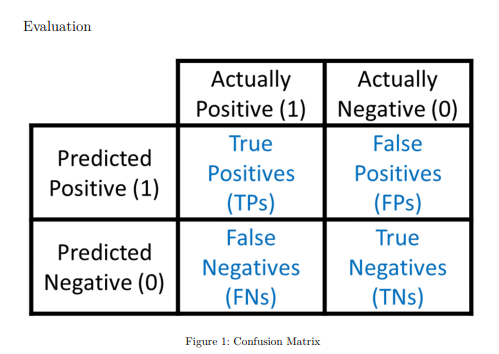

#METRICS
harmoney mean ( quy ra cùng dơn vị để tính mean (when we have different ratio) )

Nó không cho điểm cao nếu có một số quá thấp.

In [124]:
x1 = 1/2
x2 = 1/3
#example

In [126]:
#Arithmetric Mean:
print(x1+x2 / 2)
#Harmonic Mean:
print( 2/((1/x1))+((1/x2)))

# the different x1-x2 small the different of 2 these small too

0.6666666666666666
4.0


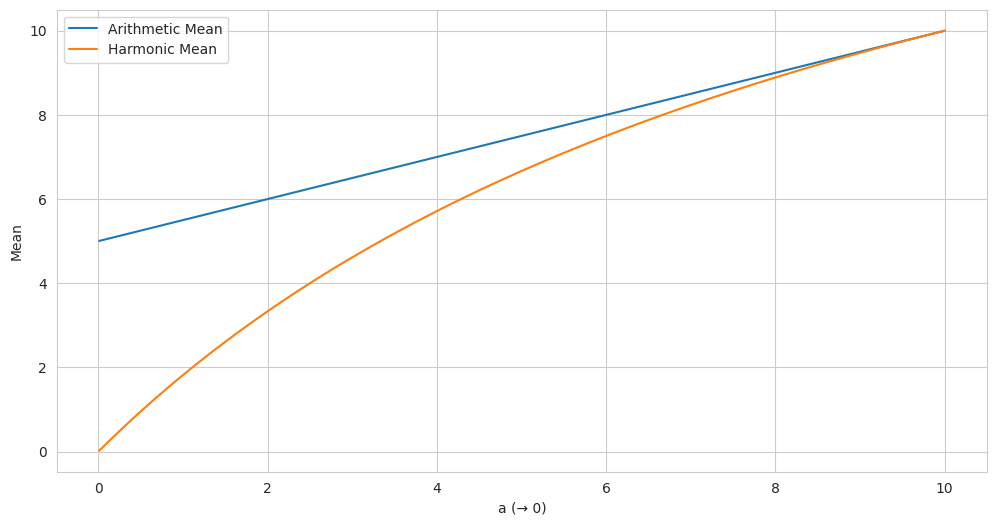

In [128]:
import numpy as np
import matplotlib.pyplot as plt

def a_mean(a, b):
    return (a + b) / 2

def h_mean(a, b):
    return 2 / (1/a + 1/b)

b = 10                      # cố định b
a = np.linspace(0.01, 10, 300)   # cho a tiến dần về 0

plt.figure()
plt.plot(a, a_mean(a, b), label="Arithmetic Mean")
plt.plot(a, h_mean(a, b), label="Harmonic Mean")

plt.xlabel("a (→ 0)")
plt.ylabel("Mean")
plt.legend()
plt.show()


#EXAMPLE: COVID-19 Testing

chup

In [127]:
TP,FP = 0,0
FN,TN = 100, 9900

In [131]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = (FP + FN) / (TP + TN + FP + FN)
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) != 0 else 0
accuracy, recall, precision, f1, error_rate

(0.99, 0.0, 0, 0, 0.01)

#Scenario 2


chup

In [132]:
TP,FP = 90,200
FN,TN =10, 9700

In [134]:
(TP + TN) / 10000

0.979

In [135]:
TP / (TP + FN)

0.9

In [136]:
TP / (TP + FP)

0.3103448275862069

In [137]:
2*(TP) / (2*TP + FP + FN)

0.46153846153846156

In [142]:
# Evaluation
print(f1_score(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.963963963963964
0.9532163742690059
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        59
           1       0.97      0.96      0.96       112

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

[[ 56   3]
 [  5 107]]
